### 60. 単語ベクトルの読み込みと表示

Google Newsデータセット（約1,000億単語）での[学習済み単語ベクトル](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?resourcekey=0-wjGZdNAUop6WykTtMip30g)（300万単語・フレーズ，300次元）をダウンロードし，”United States”の単語ベクトルを表示せよ．ただし，”United States”は内部的には”United_States”と表現されていることに注意せよ．

In [1]:
from gensim.models import KeyedVectors

file = "./GoogleNews-vectors-negative300.bin.gz"
model = KeyedVectors.load_word2vec_format(file, binary=True)
print(model["United_States"])


[-3.61328125e-02 -4.83398438e-02  2.35351562e-01  1.74804688e-01
 -1.46484375e-01 -7.42187500e-02 -1.01562500e-01 -7.71484375e-02
  1.09375000e-01 -5.71289062e-02 -1.48437500e-01 -6.00585938e-02
  1.74804688e-01 -7.71484375e-02  2.58789062e-02 -7.66601562e-02
 -3.80859375e-02  1.35742188e-01  3.75976562e-02 -4.19921875e-02
 -3.56445312e-02  5.34667969e-02  3.68118286e-04 -1.66992188e-01
 -1.17187500e-01  1.41601562e-01 -1.69921875e-01 -6.49414062e-02
 -1.66992188e-01  1.00585938e-01  1.15722656e-01 -2.18750000e-01
 -9.86328125e-02 -2.56347656e-02  1.23046875e-01 -3.54003906e-02
 -1.58203125e-01 -1.60156250e-01  2.94189453e-02  8.15429688e-02
  6.88476562e-02  1.87500000e-01  6.49414062e-02  1.15234375e-01
 -2.27050781e-02  3.32031250e-01 -3.27148438e-02  1.77734375e-01
 -2.08007812e-01  4.54101562e-02 -1.23901367e-02  1.19628906e-01
  7.44628906e-03 -9.03320312e-03  1.14257812e-01  1.69921875e-01
 -2.38281250e-01 -2.79541016e-02 -1.21093750e-01  2.47802734e-02
  7.71484375e-02 -2.81982

### 61. 単語の類似度

“United States”と”U.S.”のコサイン類似度を計算せよ

In [2]:
print(model.similarity('United_States', 'U.S.'))


0.73107743


### 62. 類似度の高い単語10件

“United States”とコサイン類似度が高い10語と，その類似度を出力せよ．

In [3]:
print(model.most_similar('United_States', topn=10))


[('Unites_States', 0.7877248525619507), ('Untied_States', 0.7541370987892151), ('United_Sates', 0.7400724291801453), ('U.S.', 0.7310774326324463), ('theUnited_States', 0.6404393911361694), ('America', 0.6178410053253174), ('UnitedStates', 0.6167312264442444), ('Europe', 0.6132988929748535), ('countries', 0.6044804453849792), ('Canada', 0.601906955242157)]


### 63. 加法構成性によるアナロジー

“Spain”の単語ベクトルから”Madrid”のベクトルを引き，”Athens”のベクトルを足したベクトルを計算し，そのベクトルと類似度の高い10語とその類似度を出力せよ．

In [4]:
print(model.most_similar(positive=['Spain', 'Athens'], negative=['Madrid'], topn=10))


[('Greece', 0.6898480653762817), ('Aristeidis_Grigoriadis', 0.560684859752655), ('Ioannis_Drymonakos', 0.5552908778190613), ('Greeks', 0.545068621635437), ('Ioannis_Christou', 0.5400862097740173), ('Hrysopiyi_Devetzi', 0.5248445272445679), ('Heraklio', 0.5207759737968445), ('Athens_Greece', 0.516880989074707), ('Lithuania', 0.5166865587234497), ('Iraklion', 0.5146791338920593)]


### 64. アナロジーデータでの実験Permalink

[単語アナロジーの評価データ](http://download.tensorflow.org/data/questions-words.txt)をダウンロードし，vec(2列目の単語) - vec(1列目の単語) + vec(3列目の単語)を計算し，そのベクトルと類似度が最も高い単語と，その類似度を求めよ．求めた単語と類似度は，各事例の末尾に追記せよ．

In [5]:
from tqdm import tqdm
file2 = './questions-words.txt'
output = './questions-words_similarity.txt'

# tqdm用のtotal数を先に調べておく
total = 0
with open(file2, 'r', encoding='utf-8') as f:
    for row in f:
        total += 1
    
category = ''
with open(file2, 'r', encoding='utf-8') as f1, \
        open(output, 'w', encoding='utf-8') as f2:
    for row in tqdm(f1, total=total):
        if row.startswith(':'):
            category = row.rstrip()[2:]
            continue
        else:
            cols = row.rstrip().split()
            word, similarity = model.most_similar(positive=[cols[1], cols[2]], negative=[cols[0]], topn=1)[0]
            f2.write('{}\t{}\t{}\t{}\n'.format(category, row.rstrip(), word, similarity))


100%|██████████| 19558/19558 [2:11:06<00:00,  2.49it/s]   


マルチプロセス用だが、どうなんだ...

In [6]:
from multiprocessing import Pool
import tqdm

def process_category(category, rows):
   output_rows = []
   for row in rows:
       cols = row.rstrip().split() 
       word, similarity = model.most_similar(positive=[cols[1], cols[2]], negative=[cols[0]], topn=1)[0]
       output_rows.append('{}\t{}\t{}\t{}\n'.format(category, row.rstrip(), word, similarity))
   return output_rows

if __name__ == '__main__':
   file2 = './questions-words.txt'
   output = './questions-words_similarity.txt'
   
   with open(file2, 'r', encoding='utf-8') as f:
       rows = f.readlines()
       
   pool = Pool(processes=4) # 並列プロセス数
   category = ''
   out_rows = []
   for row in tqdm.tqdm(rows):
       if row.startswith(':'):
           if category:
               out_rows.extend(pool.apply_async(process_category, (category, category_rows)).get())  
           category = row.rstrip()[2:]
           category_rows = []
       else:
           category_rows.append(row)
   
   out_rows.extend(pool.apply_async(process_category, (category, category_rows)).get())
   
   with open(output, 'w', encoding='utf-8') as f:
       f.writelines(out_rows) 


  3%|▎         | 507/19558 [03:00<1:53:17,  2.80it/s]


KeyboardInterrupt: 

### 65. アナロジータスクでの正解率

64の実行結果を用い，意味的アナロジー（semantic analogy）と文法的アナロジー（syntactic analogy）の正解率を測定せよ．

In [8]:
with open('questions-words_similarity.txt', 'r') as f:
    sem_cnt = 0
    sem_cor = 0
    syn_cnt = 0
    syn_cor = 0
    for line in f:
        line = line.split()
        if not line[0].startswith('gram'):
            sem_cnt += 1
        if line[4] == line[5]:
            sem_cor += 1
        else:
            syn_cnt += 1
        if line[4] == line[5]:
            syn_cor += 1

print(f'意味的アナロジー正解率: {sem_cor/sem_cnt:.3f}')
print(f'文法的アナロジー正解率: {syn_cor/syn_cnt:.3f}')

意味的アナロジー正解率: 1.622
文法的アナロジー正解率: 2.786


### 66. WordSimilarity-353での評価

[The WordSimilarity-353 Test Collection](http://www.gabrilovich.com/resources/data/wordsim353/wordsim353.html)の評価データをダウンロードし，単語ベクトルにより計算される類似度のランキングと，人間の類似度判定のランキングの間のスピアマン相関係数を計算せよ．

In [10]:
from scipy.stats import spearmanr

file = './combined.csv'
human = []
w2v = []
with open(file, 'r', encoding='utf-8') as f:
    next(f)
    for row in f:
        cols = row.rstrip().split(',')
        human.append(float(cols[2]))
        w2v.append(model.similarity(cols[0], cols[1]))

correlation, pvalue = spearmanr(human, w2v)

print('スピアマン相関係数: {}'.format(correlation))


スピアマン相関係数: 0.7000166486272194


### 67. k-meansクラスタリング

国名に関する単語ベクトルを抽出し，k-meansクラスタリングをクラスタ数k=5として実行せよ．

In [11]:
# 単語の取得
file = './questions-words_similarity.txt'
categories1 = ['capital-common-countries', 'capital-world']
categories2 = ['currency', 'gram6-nationality-adjective']
countries = set()
with open(file, 'r', encoding='utf-8') as f:
    for row in f:
        cols = row.strip().split('\t')
        if cols[0] in categories1:
            country = cols[1].split()[1]
            countries.add(country)
        elif cols[0] in categories2:
            country = cols[1].split()[0]
            countries.add(country)
        else:
            continue
countries = list(countries)
print(len(countries))
print(countries)

# 単語ベクトルの取得
countries_vec = [model[country] for country in countries]


129
['Switzerland', 'Moldova', 'Cuba', 'Guinea', 'Kyrgyzstan', 'Thailand', 'Ireland', 'Ukraine', 'Qatar', 'Mozambique', 'Estonia', 'Iceland', 'Taiwan', 'Kenya', 'Vietnam', 'Russia', 'Fiji', 'Jordan', 'Iran', 'Hungary', 'Korea', 'Syria', 'Guyana', 'Morocco', 'Albania', 'Malaysia', 'Philippines', 'Macedonia', 'Madagascar', 'Romania', 'Ecuador', 'Latvia', 'Venezuela', 'Norway', 'Azerbaijan', 'Italy', 'Bahamas', 'Chile', 'Europe', 'Netherlands', 'Gabon', 'Turkmenistan', 'Portugal', 'Belarus', 'Slovakia', 'Greece', 'Eritrea', 'Botswana', 'Israel', 'Poland', 'Cyprus', 'Rwanda', 'France', 'Kazakhstan', 'Serbia', 'Lebanon', 'Egypt', 'Mali', 'Gambia', 'Burundi', 'Lithuania', 'Honduras', 'Turkey', 'Uganda', 'Malta', 'Indonesia', 'Tajikistan', 'Uzbekistan', 'Libya', 'Liechtenstein', 'Montenegro', 'Bhutan', 'USA', 'China', 'Tunisia', 'Somalia', 'Sweden', 'Bahrain', 'Argentina', 'Angola', 'Greenland', 'Finland', 'Liberia', 'Belize', 'Laos', 'Spain', 'Armenia', 'Bulgaria', 'Afghanistan', 'Suriname',

In [12]:
from sklearn.cluster import KMeans
import numpy as np

# k-meansクラスタリング
kmeans = KMeans(n_clusters=5)
kmeans.fit(countries_vec)
for i in range(5):
    cluster = np.where(kmeans.labels_ == i)[0]
    print('cluster', i)
    print(', '.join([countries[k] for k in cluster]))


cluster 0
Cuba, Fiji, Guyana, Philippines, Ecuador, Venezuela, Bahamas, Chile, Honduras, Argentina, Belize, Suriname, Uruguay, Jamaica, Colombia, Tuvalu, Samoa, Mexico, Dominica, Peru, Brazil, Nicaragua
cluster 1
Switzerland, Ireland, Iceland, Korea, Norway, Italy, Europe, Netherlands, Portugal, France, Liechtenstein, USA, Sweden, Greenland, Finland, Spain, Belgium, Denmark, England, Japan, Austria, Germany, Australia, Canada
cluster 2
Moldova, Ukraine, Estonia, Russia, Hungary, Albania, Macedonia, Romania, Latvia, Azerbaijan, Belarus, Slovakia, Greece, Poland, Cyprus, Kazakhstan, Serbia, Lithuania, Turkey, Malta, Montenegro, Armenia, Bulgaria, Croatia, Georgia, Slovenia
cluster 3
Guinea, Mozambique, Kenya, Madagascar, Gabon, Eritrea, Botswana, Rwanda, Mali, Gambia, Burundi, Uganda, Tunisia, Somalia, Angola, Liberia, Zambia, Nigeria, Zimbabwe, Namibia, Ghana, Mauritania, Malawi, Niger, Senegal, Algeria, Sudan
cluster 4
Kyrgyzstan, Thailand, Qatar, Taiwan, Vietnam, Jordan, Iran, Syria, 

### 68. Ward法によるクラスタリング

国名に関する単語ベクトルに対し，Ward法による階層型クラスタリングを実行せよ．さらに，クラスタリング結果をデンドログラムとして可視化せよ．

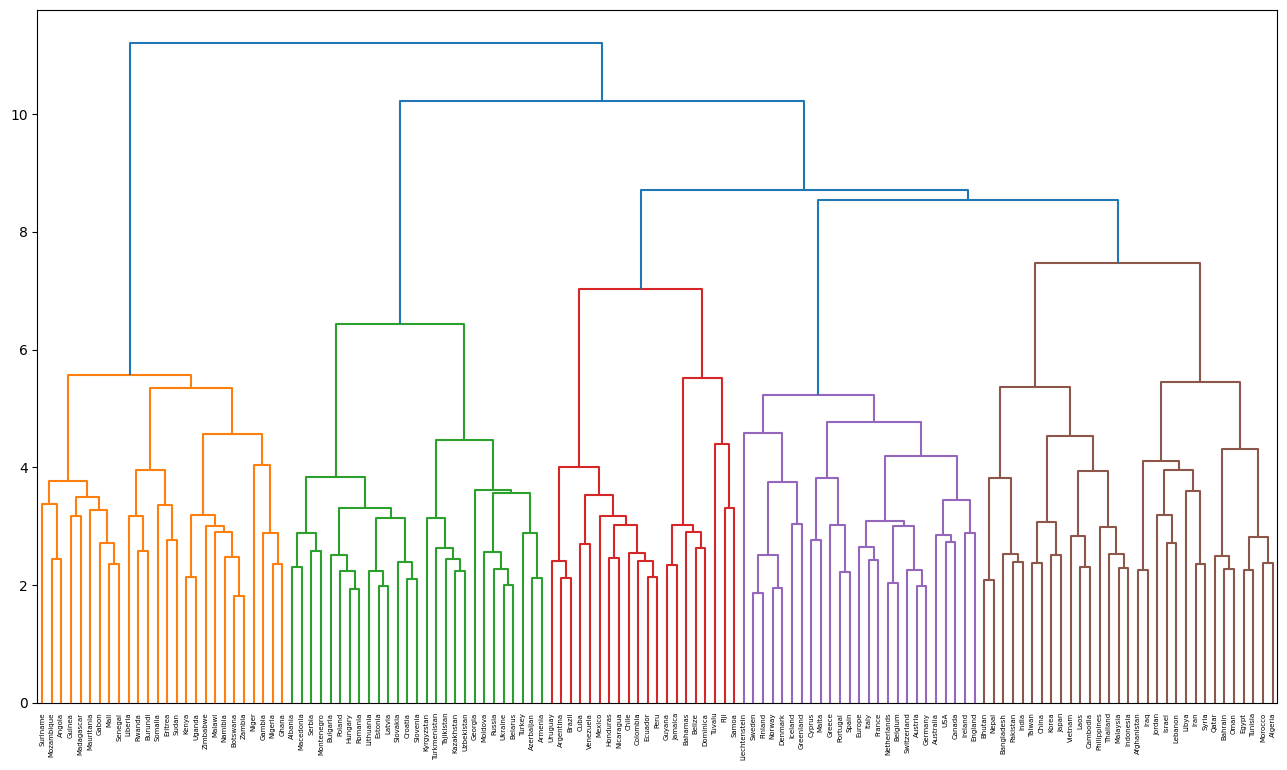

In [13]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

linkage_result = linkage(countries_vec, method='ward')

plt.figure(figsize=(16, 9))
dendrogram(linkage_result, labels=countries)
plt.savefig('fig68.png')
plt.show()


### 69. t-SNEによる可視化

ベクトル空間上の国名に関する単語ベクトルをt-SNEで可視化せよ．

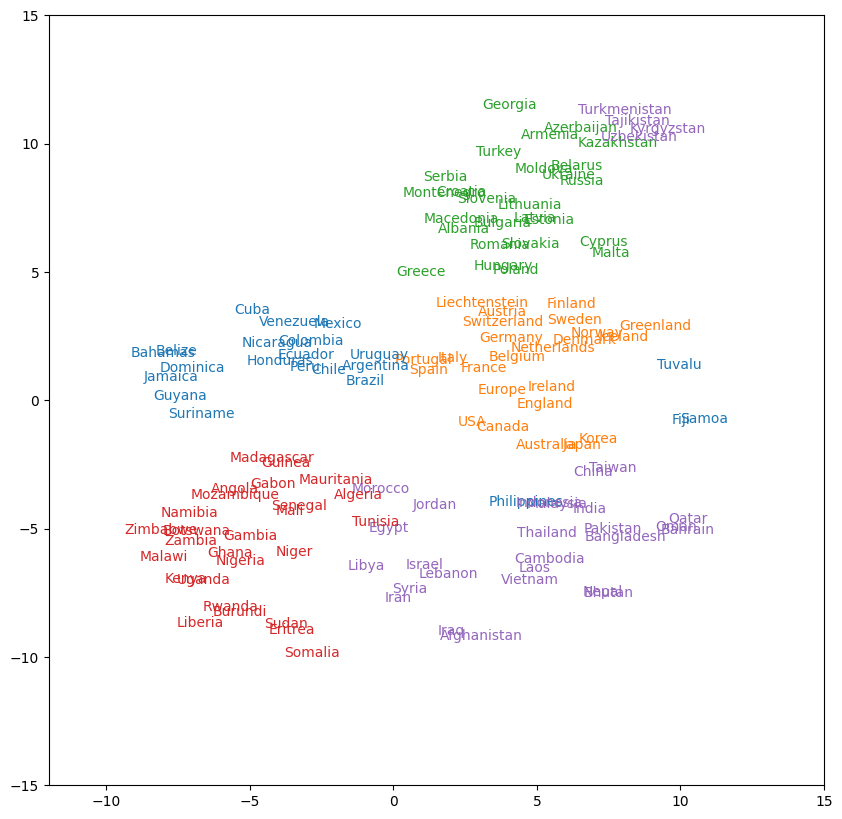

In [14]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=64)
X_reduced = tsne.fit_transform(np.array(countries_vec))
plt.figure(figsize=(10, 10))
for x, country, color in zip(X_reduced, countries, kmeans.labels_):
    plt.text(x[0], x[1], country, color='C{}'.format(color))
plt.xlim([-12, 15])
plt.ylim([-15, 15])
plt.savefig('fig69.png')
plt.show()
